In [138]:
import pandas as pd

In [139]:
df = pd.read_csv('../data/01_raw/iowa_dataset.csv')

In [140]:
df.head()

,invoice_line_no,date,store,name,address,city,zipcode,county,category,category_name,...,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons,store_location,county_number
0,INV-50346800002,2022-08-16,5359,FAREWAY STORES #168/ PEOSTA,8400 NICC DRIVE,PEOSTA,52068.0,DUBUQUE,1062400.0,SPICED RUM,...,12,750,6.00,9.00,12,108.00,9.00,2.37,NaN,NaN
1,INV-50288400002,2022-08-12,2524,HY-VEE FOOD STORE / DUBUQUE,3500 DODGE ST,DUBUQUE,52001.0,DUBUQUE,1012200.0,SCOTCH WHISKIES,...,12,1000,28.24,42.36,6,254.16,6.00,1.58,NaN,NaN
2,INV-50389200010,2022-08-17,3705,LIQUOR LOCKER,507 1ST AVE #100,ROCK RAPIDS,51246.0,LYON,1012100.0,CANADIAN WHISKIES,...,12,1000,6.64,9.96,12,119.52,12.00,3.17,NaN,NaN
3,INV-50258200004,2022-08-11,5107,KUM & GO #4098 / WINDSOR HEIGHTS,7229 UNIVERSITY AVE,WINDSOR HEIGHTS,50311.0,POLK,1012100.0,CANADIAN WHISKIES,...,8,50,8.50,12.75,1,12.75,0.05,0.01,NaN,NaN
4,INV-50378700007,2022-08-16,5203,KIMMES COON RAPIDS COUNTRY STORE #12,"516, HIGHWAY 141",COON RAPIDS,50058.0,CARROLL,1701100.0,TEMPORARY & SPECIALTY PACKAGES,...,12,750,17.49,26.24,12,314.88,9.00,2.37,"{'type': 'Point', 'coordinates': [-94.678386, ...",NaN


In [141]:
data = df[['date', 'sale_dollars']]

In [142]:
data.dtypes


date             object
sale_dollars    float64
dtype: object

In [143]:
data.sample(5)

,date,sale_dollars
5400965,2021-06-16,124.50
4832269,2021-08-02,23.55
6316854,2022-03-07,26.22
5279173,2022-02-04,157.50
5115067,2021-08-10,24.76


In [144]:
data.dropna()

,date,sale_dollars
0,2022-08-16,108.00
1,2022-08-12,254.16
2,2022-08-17,119.52
3,2022-08-11,12.75
4,2022-08-16,314.88
...,...,...
7801637,2020-01-30,6.16
7801638,2020-01-31,233.52
7801639,2020-01-31,119.28
7801640,2020-01-29,2281.20


In [145]:
# Converting "date" column to "datetime" type using "pandas" library:
df2 = data.copy()

df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='coerce')

In [146]:
df2.dtypes

date            datetime64[ns]
sale_dollars           float64
dtype: object

In [147]:
df2.set_index('date', inplace=True)

In [148]:
df2.sample(5)

,sale_dollars
date,
2022-12-28,45.00
2020-02-03,99.00
2021-01-06,199.68
2022-02-03,64.80
2021-04-13,49.52


In [149]:
df2.describe()

,sale_dollars
count,7.801642e+06
mean,1.606799e+02
std,5.701766e+02
min,-9.720000e+03
25%,4.200000e+01
50%,8.700000e+01
75%,1.630800e+02
max,2.509320e+05


In [150]:
df_weekly = pd.DataFrame(df2)
df_monthly = pd.DataFrame(df2)

In [151]:
monthly_sales = df_weekly.resample('M').mean()

In [152]:
# Plotting data
import matplotlib.pyplot as plt

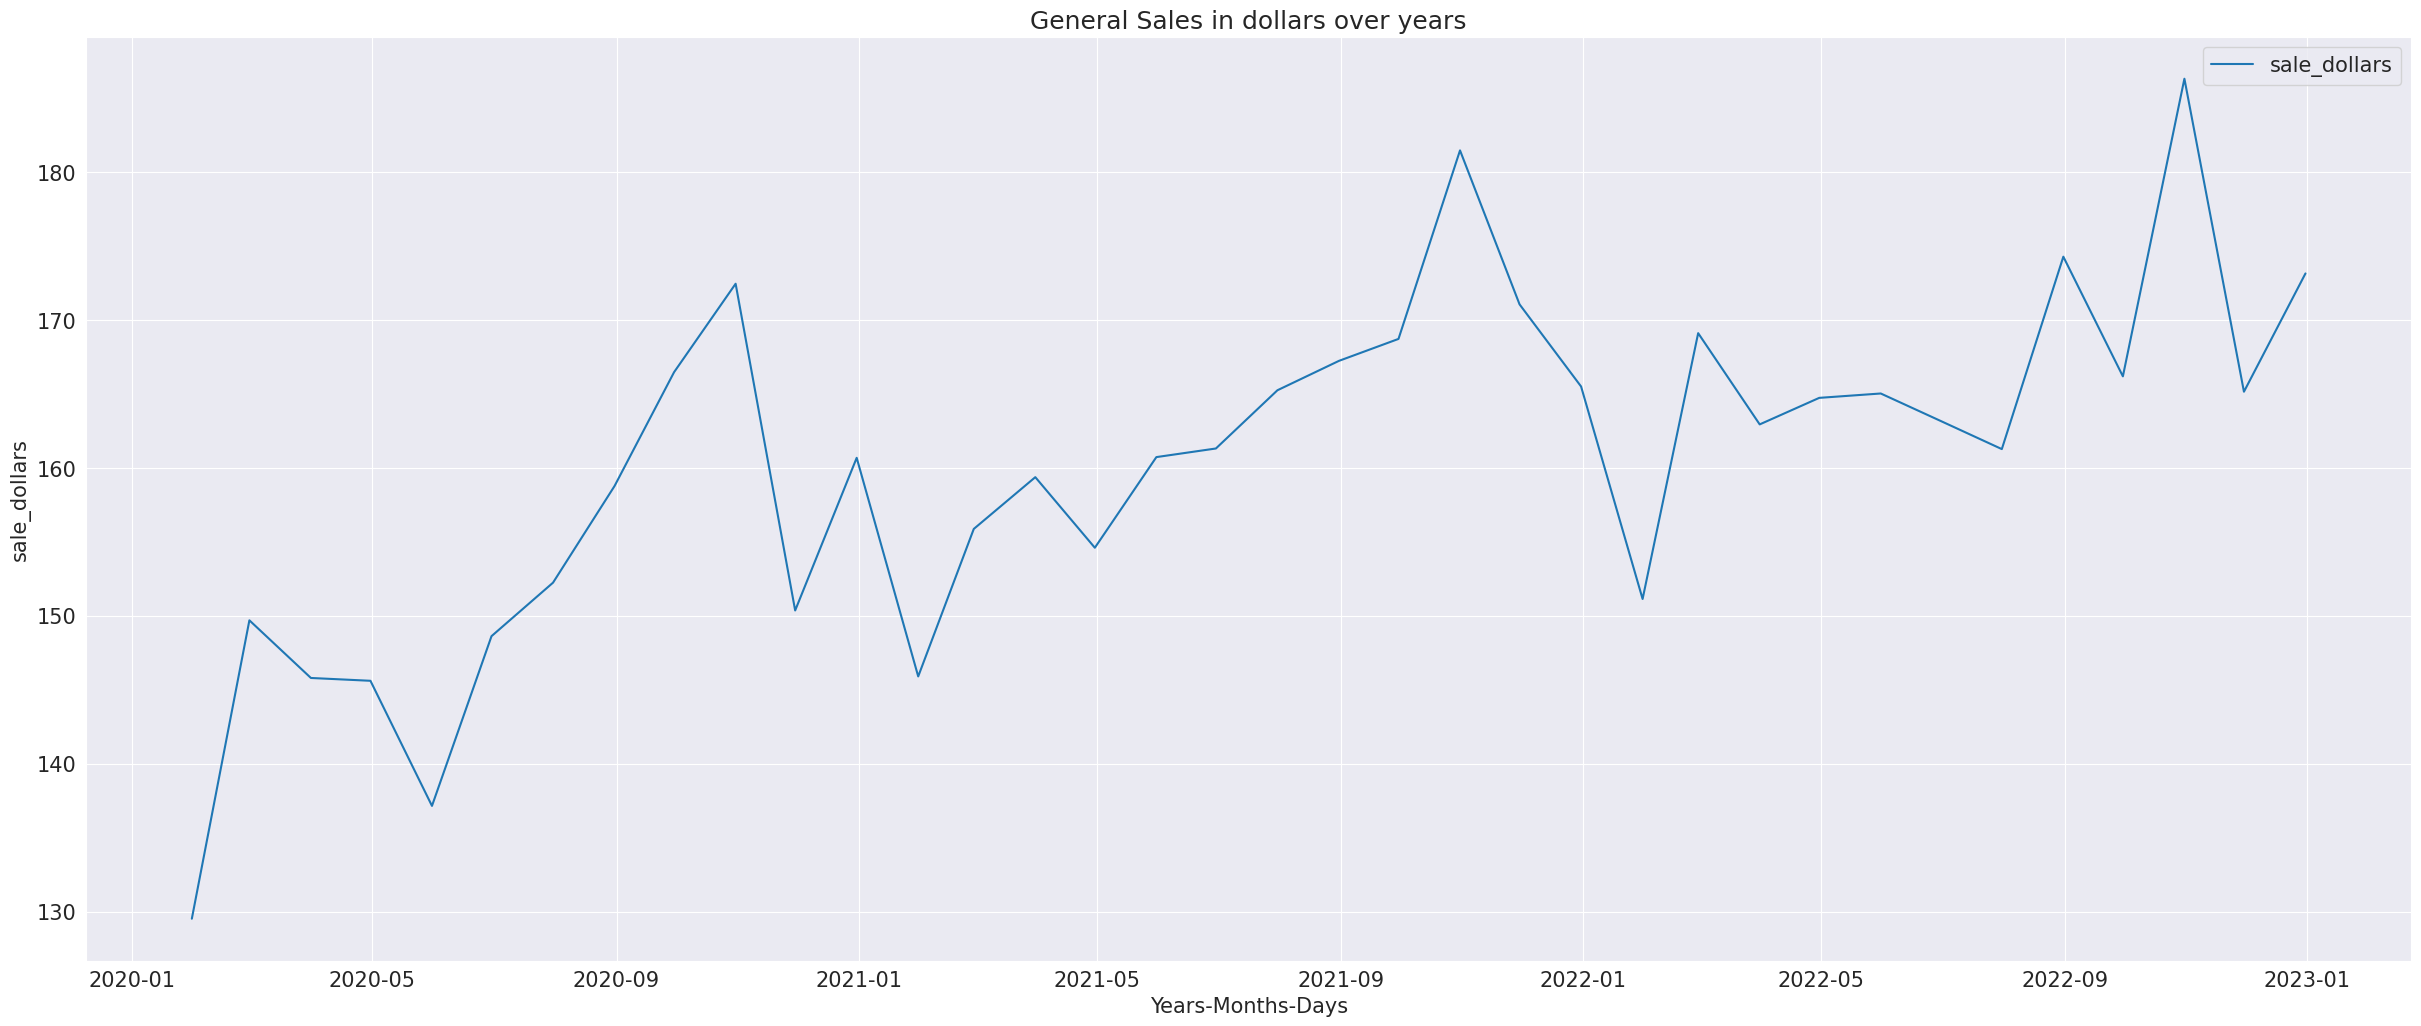

In [153]:
plt.figure(figsize= (30,12))
plt.plot(monthly_sales['sale_dollars'], label = "sale_dollars")
plt.legend()
plt.title('General Sales in dollars over years')
plt.xlabel("Years-Months-Days")
plt.ylabel("sale_dollars")
plt.show();

In [154]:
weekly_sales = df_monthly.resample('W').mean()

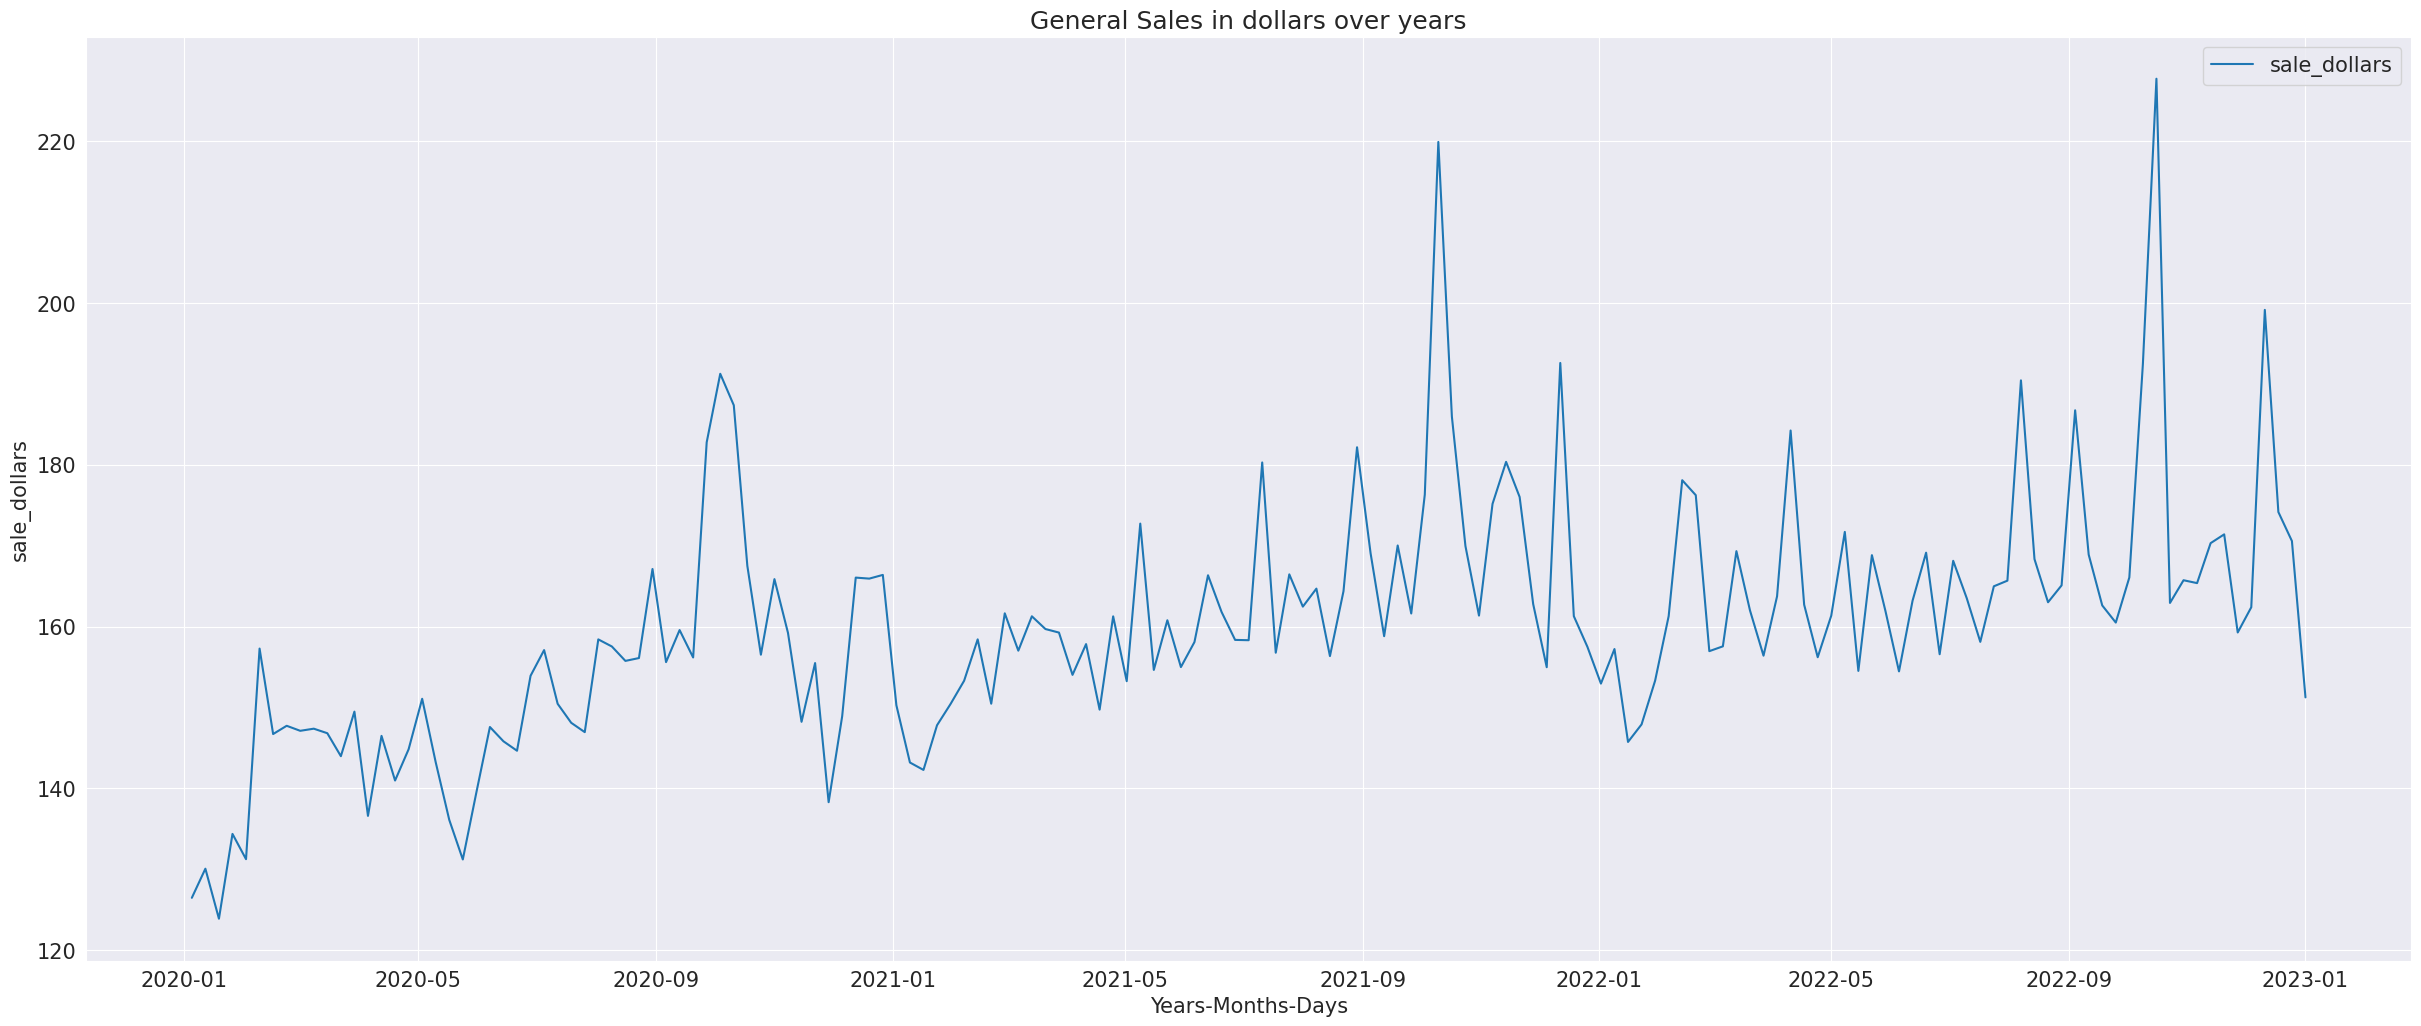

In [155]:
plt.figure(figsize= (30,12))
plt.plot(weekly_sales['sale_dollars'], label = "sale_dollars")
plt.legend()
plt.title('General Sales in dollars over years')
plt.xlabel("Years-Months-Days")
plt.ylabel("sale_dollars")
plt.show();

Checking Signal Decomposition

In [156]:
df2 = df2[df2['sale_dollars'] > 0]

In [157]:
df2Sarimax = df2.resample('W').mean()

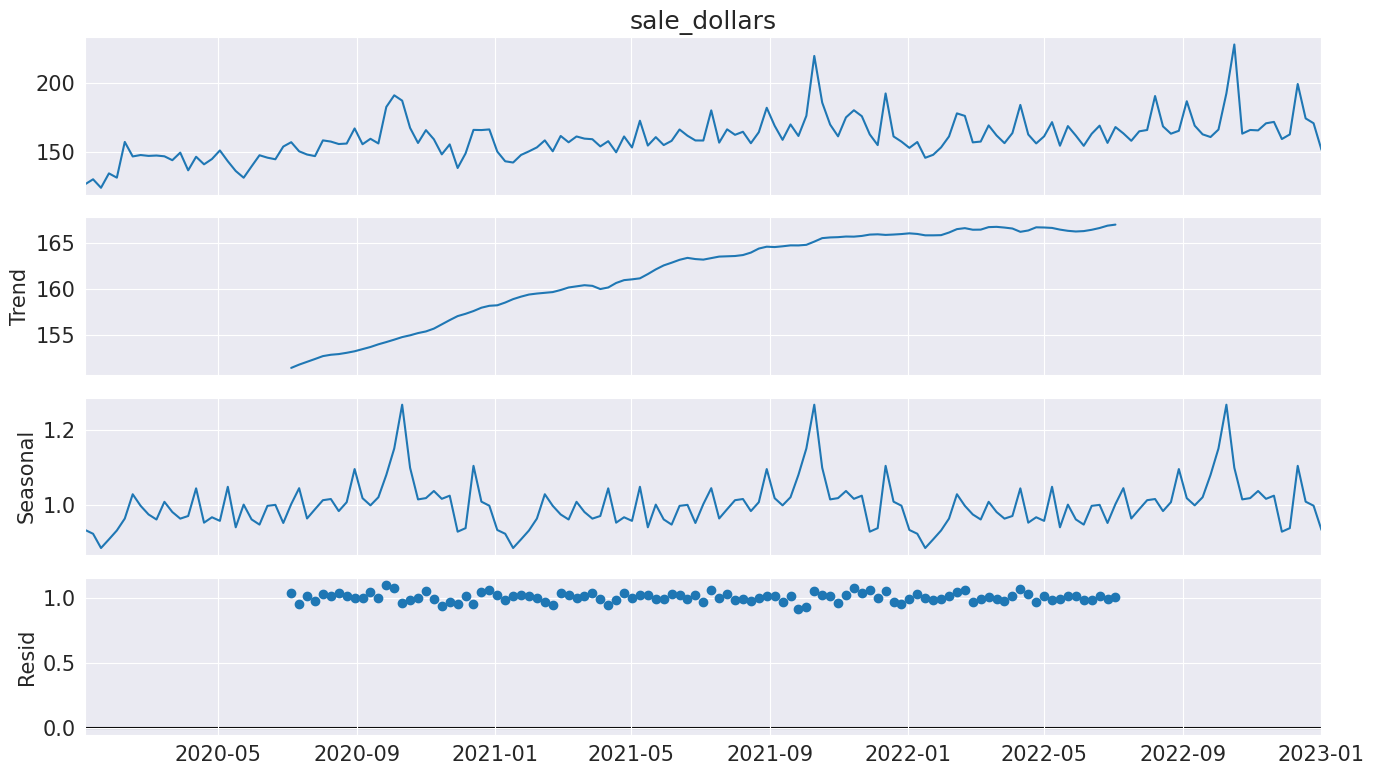

In [158]:
# plot all the components after decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(df2Sarimax['sale_dollars'],model='multiplicative')
fig = result.plot()

Stationarity checking:

A stationary time series is one whose statistical properties,
such as mean and variance, remain constant over time.

Non-stationary time series may exhibit trends or seasonality,
making it challenging to model and forecast accurately.

In [159]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root, indicating it is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [160]:
adfuller_test(df2Sarimax['sale_dollars'])

ADF Test Statistic : -3.7020182084793007
p-value : 0.004084855621590764
#Lags Used : 3
Number of Observations Used : 153
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root, indicating it is stationary


In [161]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    print(pvalue)
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [162]:
check_stationarity(df2Sarimax['sale_dollars'])

0.004084855621590764
The series is stationary


Plot ACF and PACF

In [163]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

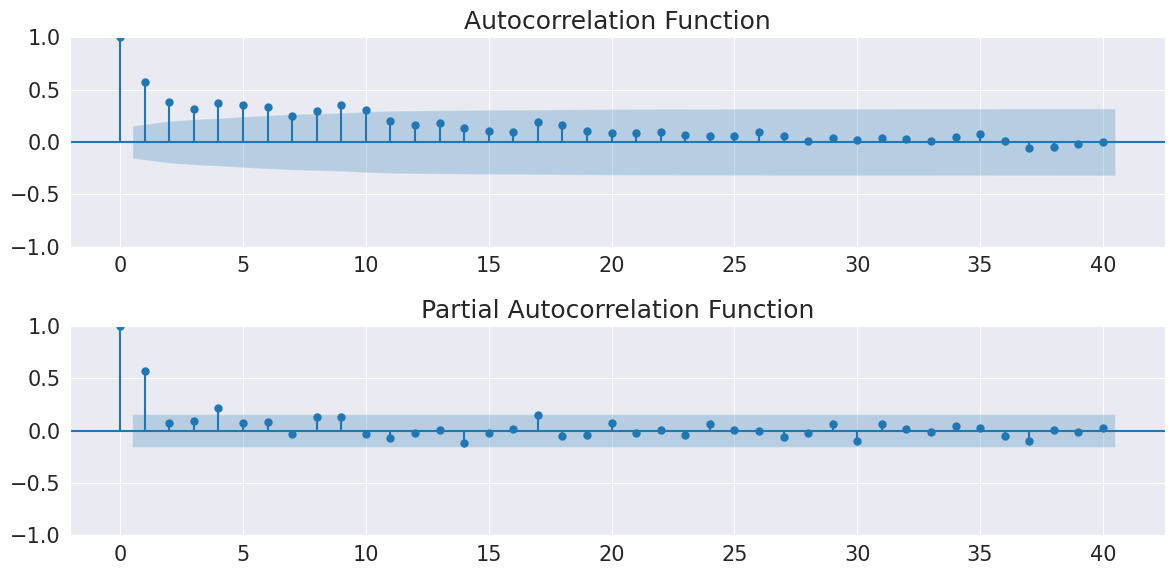

In [164]:
# plot ACF and PACF on initial given sales values:
# Create a 2x1 subplot grid
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 6))

# Plot Autocorrelation Function (ACF)
plot_acf(df2Sarimax['sale_dollars'], lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function')

# Plot Partial Autocorrelation Function (PACF)
plot_pacf(df2Sarimax['sale_dollars'], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

ARIMA

In [184]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [185]:
arima_model = ARIMA(weekly_sales['sale_dollars'], order=(12,0,3))

In [186]:
best_model = auto_arima(weekly_sales['sale_dollars'], seasonal=False, m=1,
                        start_p=0, start_q=0, max_p=5, max_q=5, d=1,
                        trace=True, error_action='ignore', suppress_warnings=True)

print(best_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1261.535, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1251.178, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1226.676, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1259.556, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1216.892, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1218.565, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1217.389, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1242.910, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1220.305, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1217.709, Time=0.05 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.618 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  157
M

In [187]:
#arima_model_fit = best_model.fit(weekly_sales['sale_dollars'])
arima_model_fit = best_model.fit()

TypeError: ARIMA.fit() missing 1 required positional argument: 'y'

In [ ]:
arima_model_fit.summary()

In [188]:
# check the shape of the model
weekly_sales.shape

(157, 2)

In [189]:
# forecast the model:
weekly_sales['forecast'] = arima_model_fit.predict(start = 130, end = 156, dynamic = True)

<Axes: xlabel='date'>

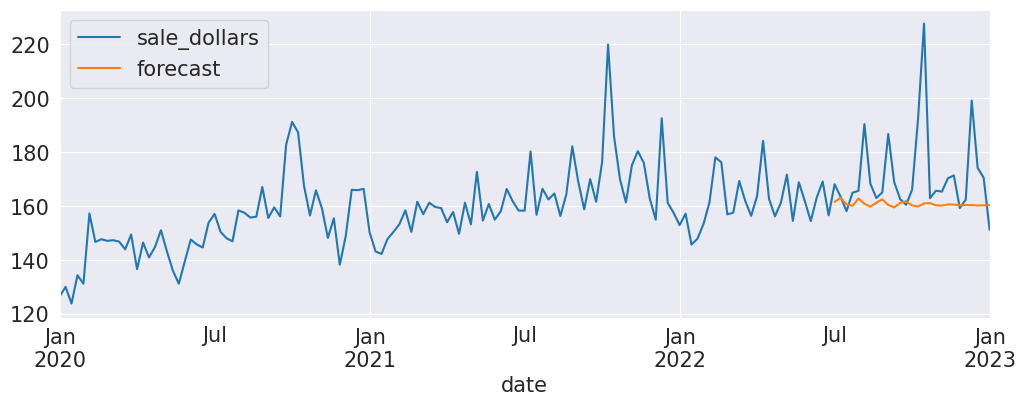

In [190]:
# compare the foracasted value by plotting actual values together:
weekly_sales[['sale_dollars', 'forecast']].plot(figsize=(12,4))

In [173]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

SARIMAX

In [174]:
weekly_sarimax = df_weekly.resample('W').mean()

In [232]:
# Initialize the SARIMA Model
sarima_model=sm.tsa.statespace.SARIMAX(weekly_sarimax['sale_dollars'],order=(1, 1, 1),seasonal_order=(14,1,0,12))
# trzeba pobawić się tymi wartościami order i seasonal_order, żeby skonfigurować odpowiednio model

In [ ]:
# Fitting the SARIMA model:
sarima_model_fit = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77258D+00    |proj g|=  1.42453D+00


 This problem is unconstrained.



At iterate    5    f=  3.79530D+00    |proj g|=  4.71340D-02

At iterate   10    f=  3.70388D+00    |proj g|=  3.45159D-02

At iterate   15    f=  3.66218D+00    |proj g|=  6.29512D-02

At iterate   20    f=  3.63345D+00    |proj g|=  8.54821D-03

At iterate   25    f=  3.62771D+00    |proj g|=  5.91776D-03

At iterate   30    f=  3.62733D+00    |proj g|=  2.04883D-03

At iterate   35    f=  3.62691D+00    |proj g|=  5.62834D-03

At iterate   40    f=  3.62652D+00    |proj g|=  1.62794D-03


In [ ]:
# forecasting the sales avlue using SARIMAX model from week 130 to 156
weekly_sarimax['sarima_forecast'] = sarima_model_fit.predict(start=130,end=156,dynamic=True)

In [ ]:
# compare the foracasted value by plotting actual values together:
weekly_sarimax[['sale_dollars', 'sarima_forecast']].plot(figsize=(12,4))

Prediction Outcomes

In [179]:
# Import DateOffset:
from pandas.tseries.offsets import DateOffset
# appending future dates in dataframe index:  -- (Let's say for 24 months)
future_dates = [weekly_sales.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [180]:
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = weekly_sales.columns)

In [181]:
# Concatenating both the dataframes:

future_df = pd.concat([weekly_sales, future_datest_df])

/tmp/ipykernel_2750565/2456435533.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([weekly_sales, future_datest_df])


In [182]:
# Forecasting the Sales values based on above SARIMAX Model:

future_df['sarima_forecast'] = sarima_model_fit.predict(start = 150, end = 170, dynamic= True)  

<Axes: >

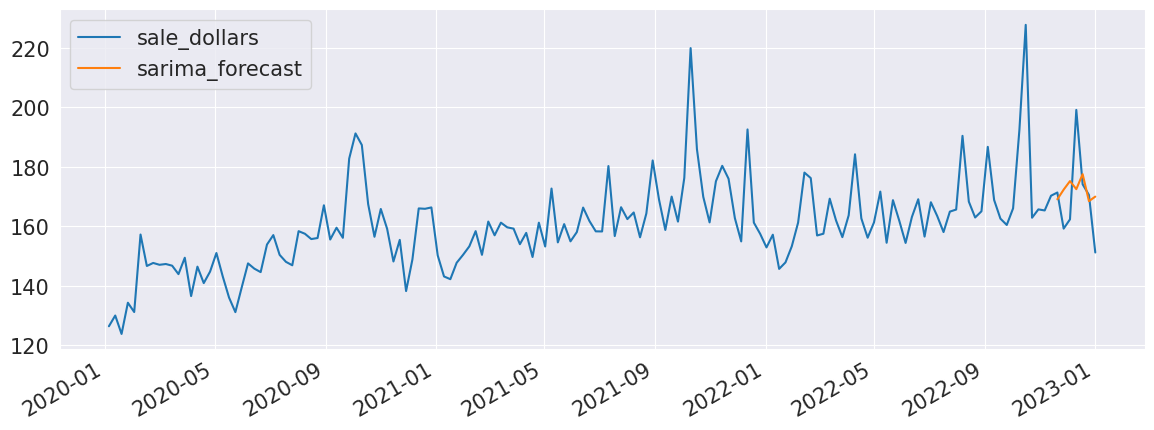

In [183]:
# Plotting the final predicted Sales value for next 2-years:

future_df[['sale_dollars', 'sarima_forecast']].plot(figsize=(14, 5)) 